In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
df  = pd.read_csv("data/Telecom_data.csv")

In [3]:
y = df.loc[:,"churn"]

In [4]:
cat_data = df.loc[:,["region","ed","custcat"]]

In [5]:
cat_data = pd.get_dummies(cat_data.astype(str))

In [6]:
cat_data.head()

,region_1,region_2,region_3,ed_1,ed_2,ed_3,ed_4,ed_5,custcat_1,custcat_2,custcat_3,custcat_4
0,0,1,0,0,0,0,1,0,1,0,0,0
1,0,0,1,0,0,0,0,1,0,0,0,1
2,0,0,1,1,0,0,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,0,0,0,0,1,0


In [7]:
X = df.drop(["churn","region","ed","custcat"],axis=1)

In [8]:
X = pd.concat([X,cat_data],axis=1)

In [9]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [10]:
# Split your dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=44)

In [11]:
X_train.shape,y_train.shape

((800, 38), (800,))

In [12]:
# plot losses by epoch
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error ')
  plt.legend()
  plt.grid(True)

In [80]:
model = model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(38,)),
#   tf.keras.layers.Dense(38, activation='tanh'),
#   tf.keras.layers.Dense(30, activation='tanh'),
#   tf.keras.layers.Dense(15, activation='tanh'),
#   tf.keras.layers.Dense(9, activation='tanh'),
  tf.keras.layers.Dense(5, activation='tanh'),
  #tf.keras.layers.Dense(48, activation='tanh'),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

In [81]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [82]:
model.fit(X_train, y_train,epochs=30,verbose=0,validation_split=0.2)

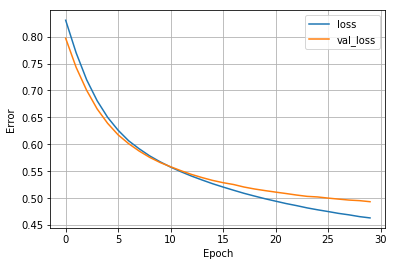

In [83]:
plot_loss(model.history)

In [84]:
pred = model.predict(X)
pred_test = model.predict(X_test)

In [85]:
output=[]
output_test=[]
for p in pred:
    if(p>0.1):
        output.append(1)
    else:
        output.append(0)
for p in pred_test:
    if(p>0.1):
        output_test.append(1)
    else:
        output_test.append(0)


In [86]:
from sklearn.metrics import confusion_matrix,plot_roc_curve,roc_curve,auc
#from sklearn import datasets, metrics, model_selection, svm

In [87]:
confusion_matrix(y, output)

array([[111, 615],
       [  8, 266]])

In [88]:
confusion_matrix(y_test, output_test)

array([[ 24, 109],
       [  2,  65]])

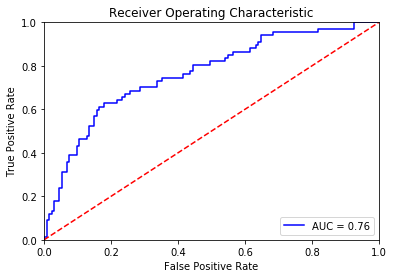

In [89]:
fpr, tpr, threshold = roc_curve(y_test, pred_test)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

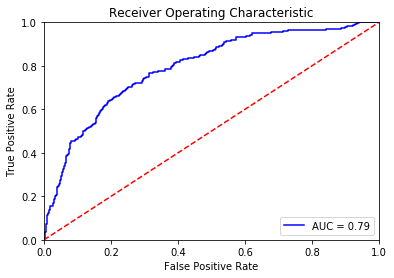

In [90]:
fpr, tpr, threshold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()